In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ZCTan762/enterprise_datascience_project/main/winemag-data-130k-v2.csv\
?token=GHSAT0AAAAAABQLJYN4CUJOWPUXS44A667AYQPUXYQ',index_col=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [62]:
df[df.duplicated('description',keep=False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [16]:
df = df.drop_duplicates('description')

df.shape

(119955, 13)

In [17]:
from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

## Check missing values

In [29]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [30]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 13 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
region_2,73195,61.0
designation,34532,28.8
taster_twitter_handle,29441,24.5
taster_name,24912,20.8
region_1,19558,16.3
price,8388,7.0
country,59,0.0
province,59,0.0
variety,1,0.0


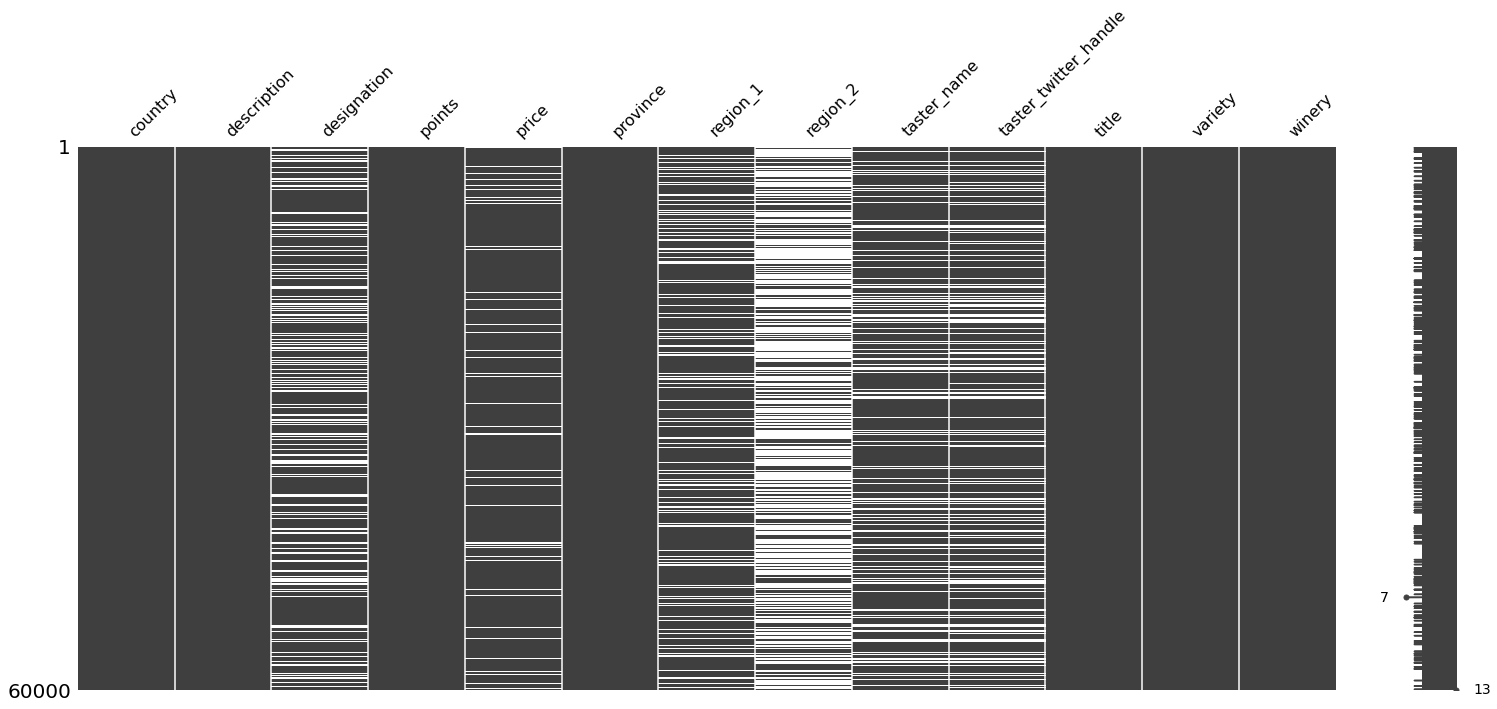

In [33]:
import missingno as msno
ax = msno.matrix(df.sample(60000))

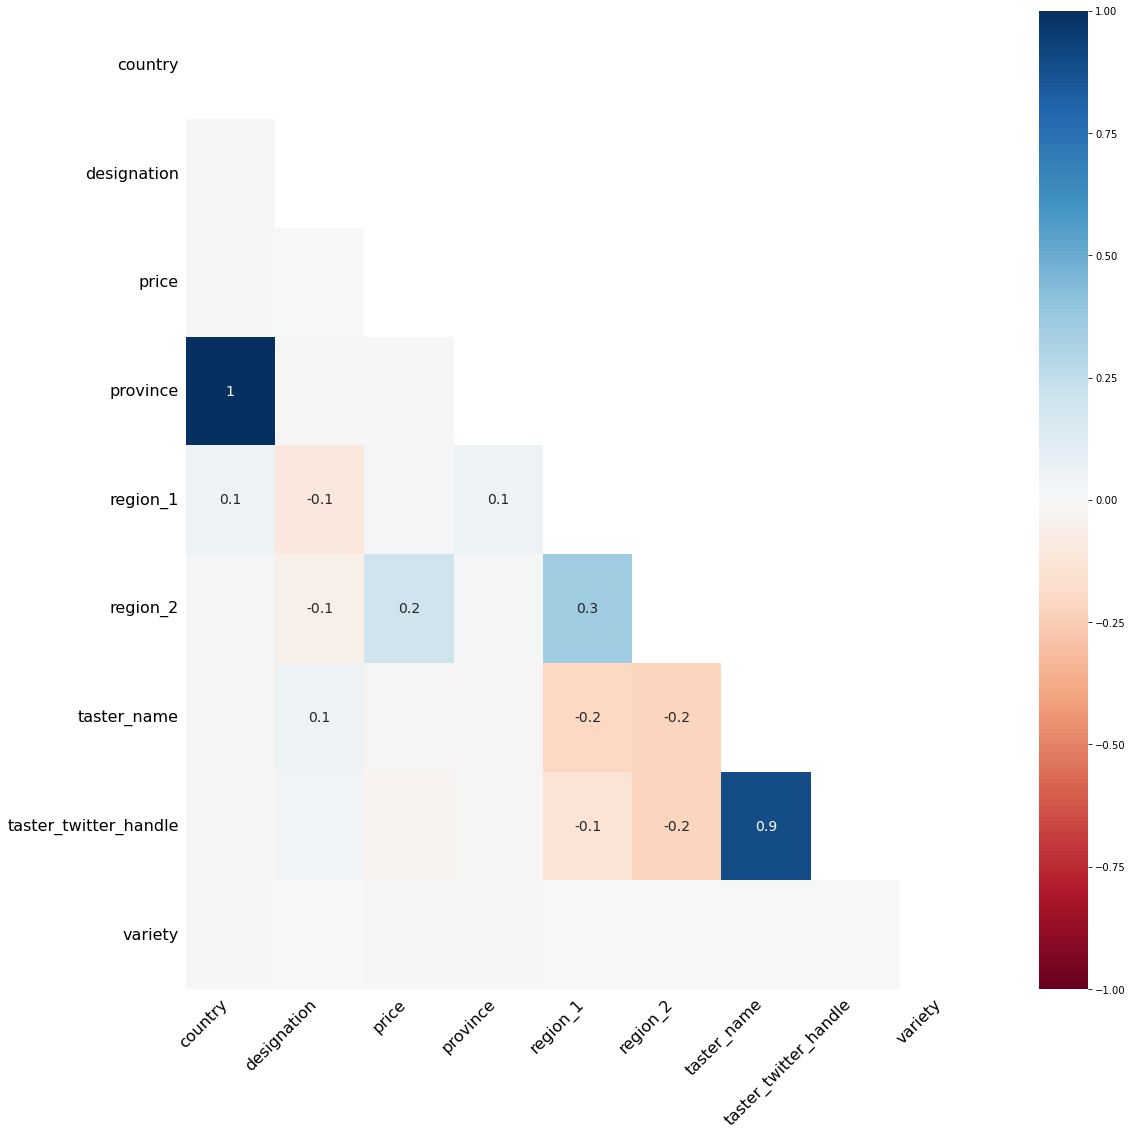

In [34]:
ax = msno.heatmap(df, figsize=(18, 18))

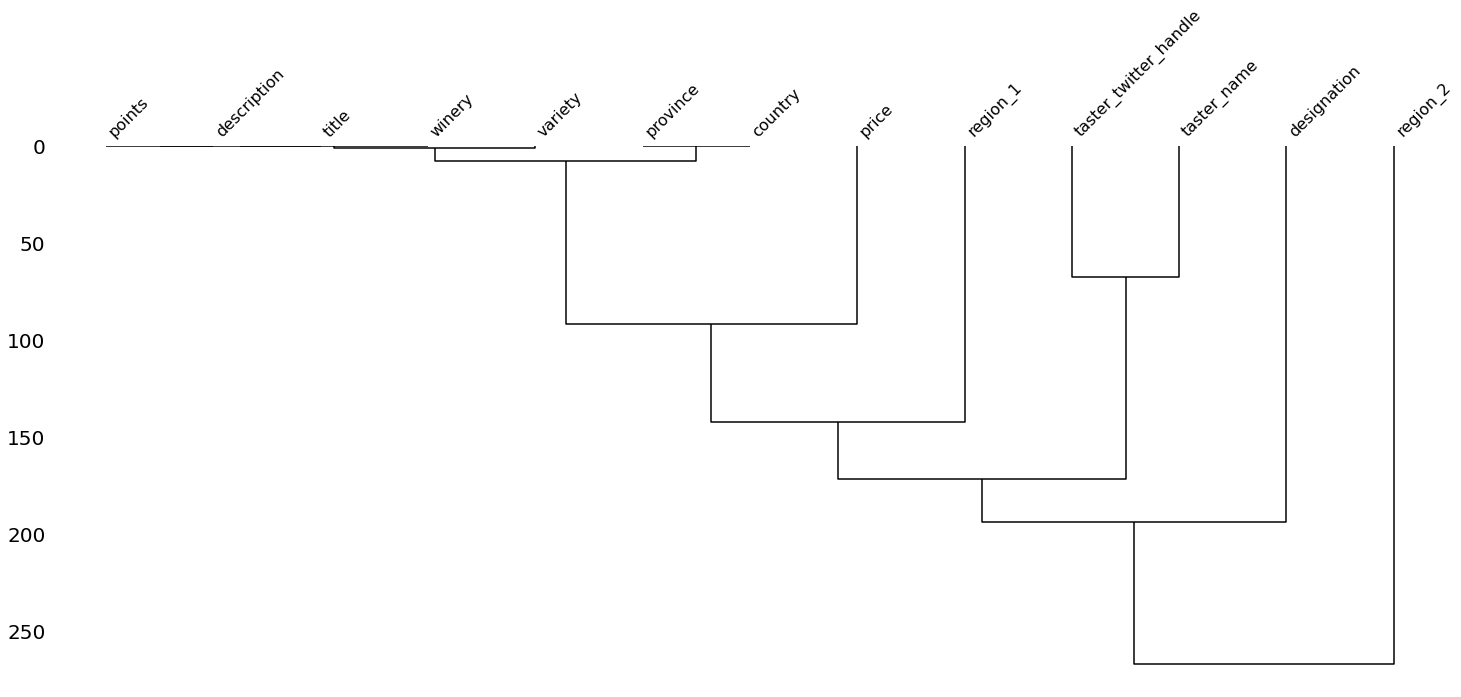

In [35]:
ax = msno.dendrogram(df)

## Add indicator for missing values

60% of region 2 is missing, which represent roughlt half of the dataset. This indicates this missingness is not at random. So we decide to add an indicator to missing region 2 rows.

In [37]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [40]:
df1 = df.assign(
    region_2_missing=add_indicator("region_2")
)

In [41]:
df1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_2_missing
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,1
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,1


# Target

## Check distinct values in wine price

In [50]:
df.price.isna().sum()

8388

Around 8k obs have missing price, so we drop them

In [51]:
df = df.dropna(subset=['price'])

In [52]:
len(df['price'].unique())

390

<AxesSubplot:xlabel='price', ylabel='Count'>

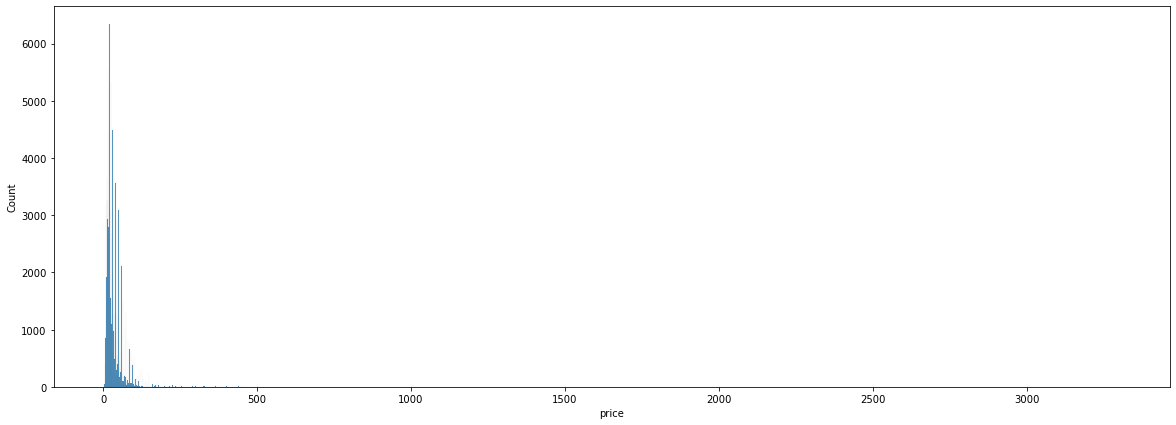

In [53]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df)

The distrbution is very skewed

<AxesSubplot:xlabel='price', ylabel='Count'>

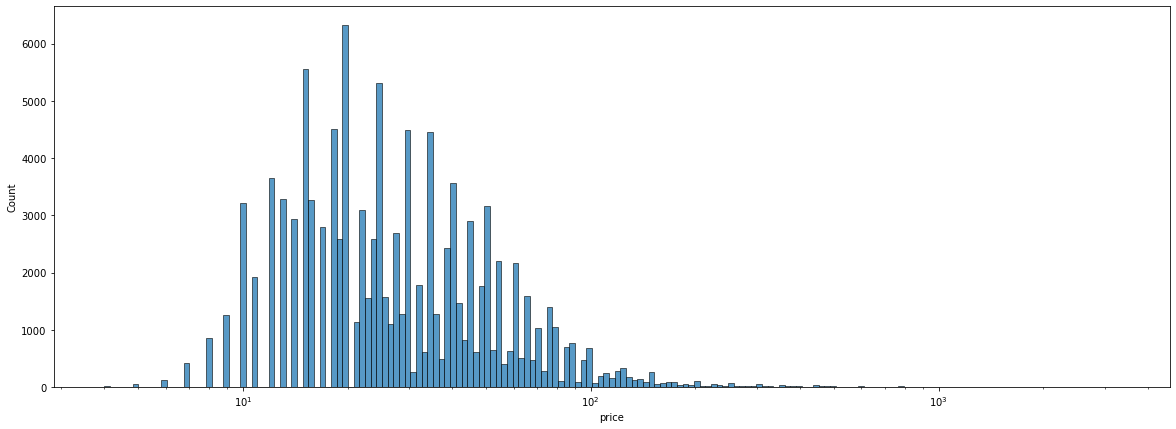

In [54]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df,log_scale=True)

After log-transforming the distribution, we find this is more normal, but still skewed to the right due to those very  expensive wines

Most of the prices are below 200. So we zoom in to see the distribution of those which have price less than 200

<AxesSubplot:xlabel='price', ylabel='Count'>

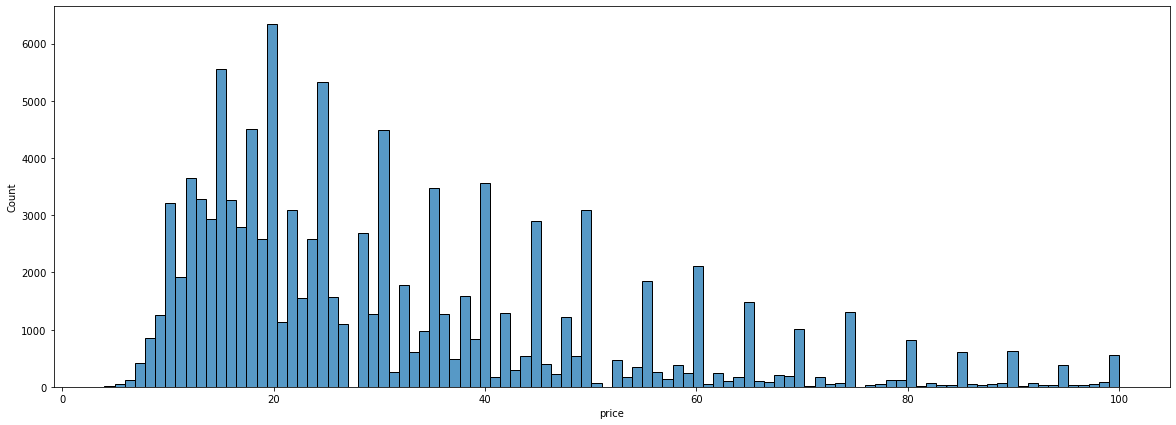

In [61]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df[df.price<=100])

This is still very skewed.

In [60]:
len(df[df.price<=100])/len(df) 

0.9710577500515385

About 97% of all wines have price less than 100. 

### Country

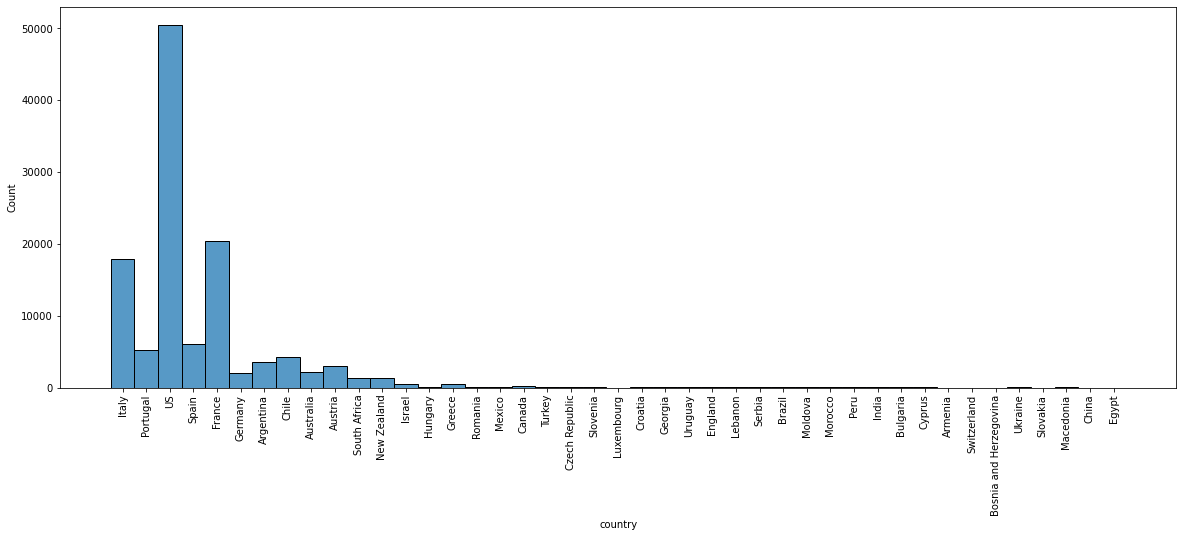

In [26]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='country',data=df)
plt.xticks(rotation = 90)
plt.show()

### Description

In [64]:
from wordcloud import WordCloud, STOPWORDS

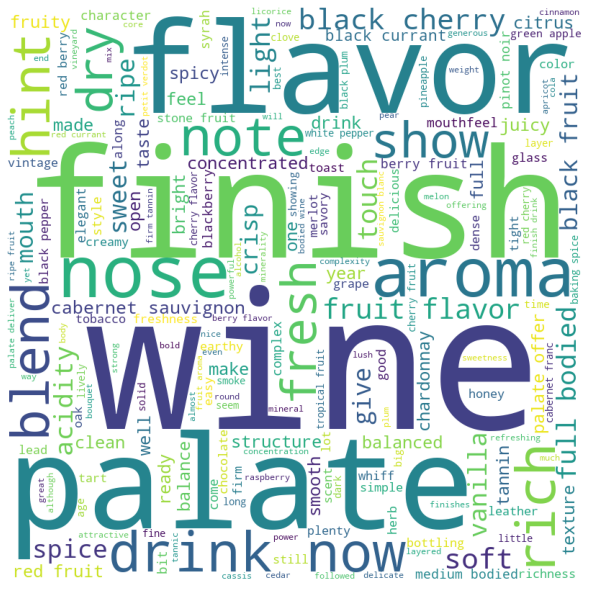

In [67]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',prefer_horizontal=0.5,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Designiation

In [70]:
df.designation.nunique()

35772

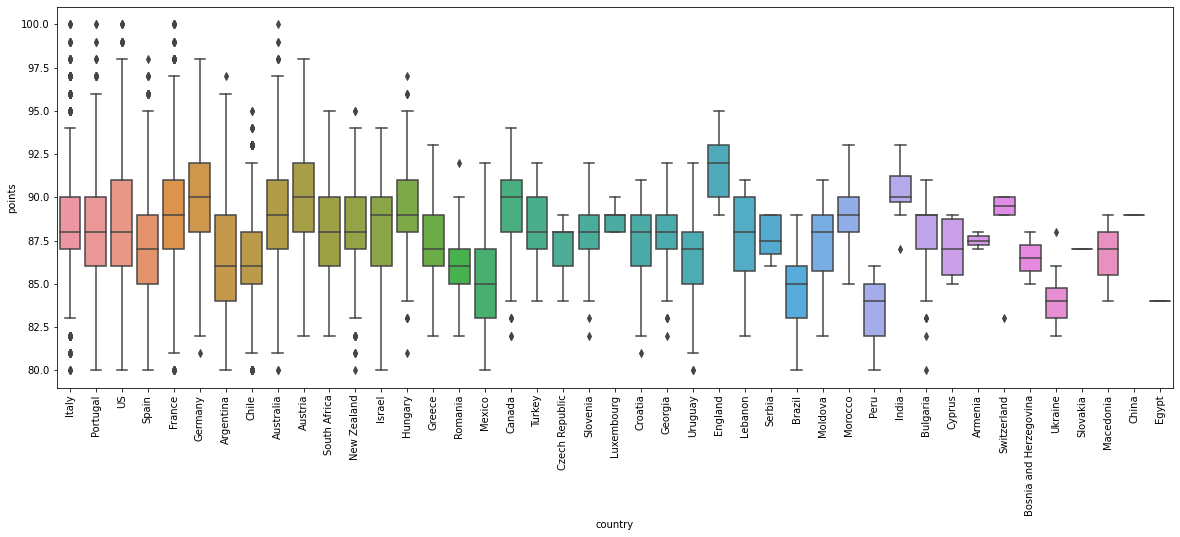

In [27]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=df, ax = ax)
plt.xticks(rotation = 90)
plt.show()

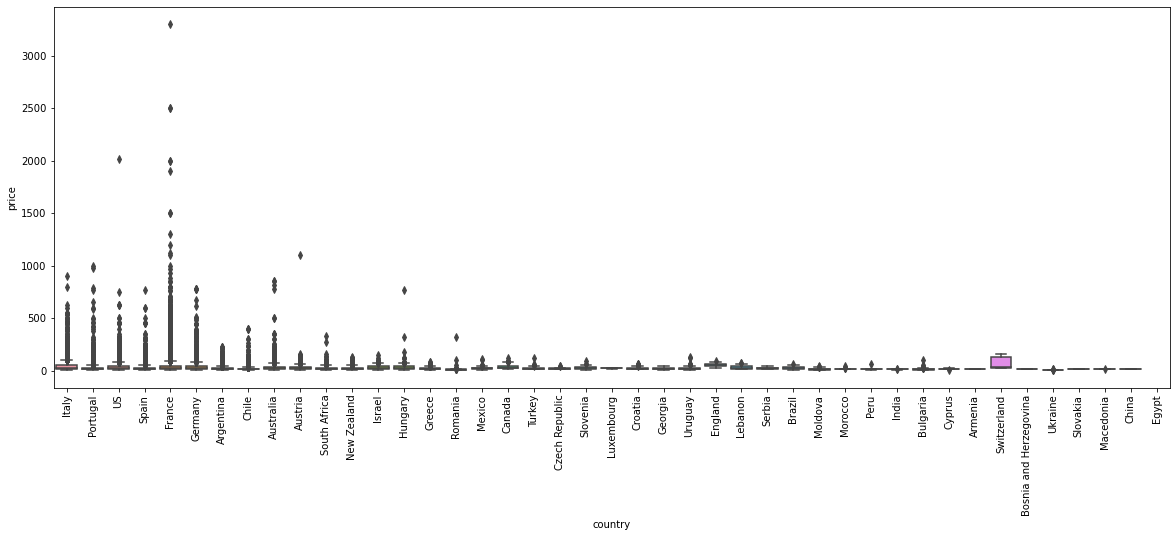

In [28]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='price', data=df, ax = ax)
plt.xticks(rotation = 90)
plt.show()